In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteI8WVCM/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteI8WVCM/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteI8WVCM/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

Epoch 1/3
391/391 [==============================] - 973s 2s/step - loss: 0.6046 - accuracy: 0.6433 - val_loss: 0.4283 - val_accuracy: 0.8207
Epoch 2/3
391/391 [==============================] - 1004s 3s/step - loss: 0.3544 - accuracy: 0.8567 - val_loss: 0.4179 - val_accuracy: 0.8437
Epoch 3/3
391/391 [==============================] - 1007s 3s/step - loss: 0.2740 - accuracy: 0.8939 - val_loss: 0.4248 - val_accuracy: 0.8275


In [6]:

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

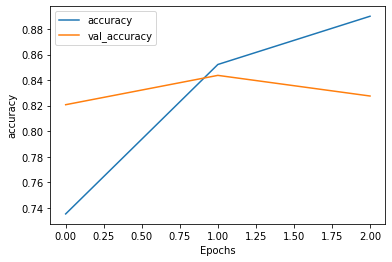

In [7]:
plot_graphs(history, 'accuracy')

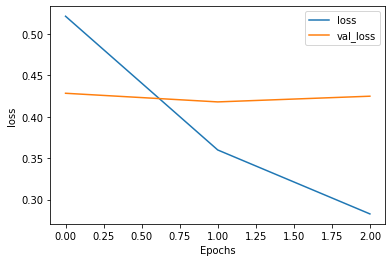

In [8]:
plot_graphs(history, 'loss')